# Pharmaceutical Sales prediction

## Imports

In [1]:
import warnings
import pickle
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
import plotly.io as pio
from IPython.display import Image


In [2]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
colors = ['#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF',
          '#FECB52', '#636EFA', '#EF553B', '#00CC96', '#AB63FA', ]

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_cleaner import DfCleaner
from df_outlier import DfOutlier
from dvc_helper import DvcHelper
from vis_plotly import VisPlotly
from vis_seaborn import VisSeaborn
from df_overview import DfOverview

2021-07-29 12:16:03,177 — DfCleaner — DEBUG — Loaded successfully!
2021-07-29 12:16:03,180 — DfOutlier — DEBUG — Loaded successfully!
2021-07-29 12:16:04,709 — DfOverview — DEBUG — Loaded successfully!


In [3]:
sn = VisSeaborn()

## Preprocessing

We have already cleaned the data and removed outliers in preprocessing notebook. Then we had also seen which features influence sales in the exploratory section. Now we are now familiar with the data, the final part is selecting the main features and preparing them for training. I have created a script called `create_features.py` for merging both training and test data with the store data.  Then it creates the main features for training and stores them in the features folder. Let's look into the data to see which features are selected.

In [4]:
helper = DvcHelper()
train_features = helper.read_csv("../features/train_features.csv")
train_features = helper.read_csv("../features/test_features.csv")
train_sales = helper.read_csv("../features/train_sales.csv")
train_customers = helper.read_csv("../features/train_customers.csv")

2021-07-29 12:16:11,209 — DfHelper — DEBUG — file read as csv
2021-07-29 12:16:11,322 — DfHelper — DEBUG — file read as csv
2021-07-29 12:16:11,434 — DfHelper — DEBUG — file read as csv
2021-07-29 12:16:11,523 — DfHelper — DEBUG — file read as csv


In [5]:
feature_columns = [x for x in train_features]
feature_columns

['Id',
 'Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval0',
 'PromoInterval1',
 'PromoInterval2',
 'PromoInterval3',
 'Year',
 'Month',
 'Day',
 'WeekOfYear']

These are the main features selected for prediction based on data exploration.

## Loss function


## Building models with sklearn pipelines

## Post Prediction analysis


## Serialize models


## Building model with deep learning

In [7]:
# model = pickle.load(open("../scripts/mlruns/1/38208726a4b148a8ba89b3a53ab67269/artifacts/model/model.pkl", "rb"))
# model = pickle.load(open("../scripts/mlruns/1/cbf108f553ce41cf8e2593e9f1e58c14/artifacts/model/model.pkl", "rb"))
model = pickle.load(open("../scripts/mlruns/1/e596e6571b14461cb002abdb85ad7098/artifacts/model/model.pkl", "rb"))

In [8]:
model

Pipeline(steps=[('Scaling', StandardScaler()),
                ('XGBoost',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=4, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [9]:
helper = DvcHelper()
train_features = helper.read_csv("../features/train_features.csv")
train_features.head(5)

2021-07-29 02:07:52,585 — DfHelper — DEBUG — file read as csv


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3,Year,Month,Day,WeekOfYear
0,1115,1,0,0,0,0,1,1,3,2,5350,1,1990,1,22,1990,3,6,9,12,2013,1,1,1
1,746,1,0,0,0,0,1,1,3,2,4330,2,2011,1,35,2011,3,6,9,12,2013,1,1,1
2,171,1,0,0,0,0,1,1,0,0,2640,1,1990,0,0,1990,0,0,0,0,2013,1,1,1
3,694,1,0,0,0,0,1,1,0,2,460,11,2012,1,40,2012,1,4,7,10,2013,1,1,1
4,396,1,0,0,0,0,1,1,0,2,16107,1,1990,0,0,1990,0,0,0,0,2013,1,1,1


In [10]:
train_features = train_features[train_features['Open'] != 0]


In [11]:
X = train_features.drop(['Sales', 'Customers', "Store"], axis=1)
y = train_features.Sales

In [12]:
feature_columns = [x for x in X]
feature_columns

['DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval0',
 'PromoInterval1',
 'PromoInterval2',
 'PromoInterval3',
 'Year',
 'Month',
 'Day',
 'WeekOfYear']

In [13]:
model.steps[1][1].feature_importances_

array([0.03694656, 0.        , 0.20619696, 0.01028278, 0.02807955,
       0.04400232, 0.06942277, 0.07503998, 0.07111477, 0.0738563 ,
       0.14192161, 0.07102272, 0.        , 0.05689653, 0.        ,
       0.        , 0.        , 0.0108595 , 0.03917861, 0.03793063,
       0.02724847], dtype=float32)

In [14]:
feat_imp = pd.DataFrame({'Feature Importance': model.steps[1][1].feature_importances_})
feat_imp['Feature'] = feature_columns
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
Promo,0.21
Promo2,0.14
CompetitionDistance,0.08
CompetitionOpenSinceYear,0.07
CompetitionOpenSinceMonth,0.07
Promo2SinceWeek,0.07
Assortment,0.07
PromoInterval0,0.06
StoreType,0.04


In [15]:
from sklearn import metrics

def plot_confusion_metrics(actual, y_preds):
  plt.figure(figsize=(8, 6))
  cf_matrix = metrics.confusion_matrix(actual, y_preds)
  sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  plt.title('Confusion matrix', fontsize=15, fontweight='bold')
  plt.ylabel('Actual', fontsize=14)
  plt.xlabel('Predicted', fontsize=14)
  plt.show() 

def plot_feature_importance():
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
  plt.ylabel('Feature', fontsize=14)
  plt.xlabel('Feature Importance', fontsize=14)
  plt.show()

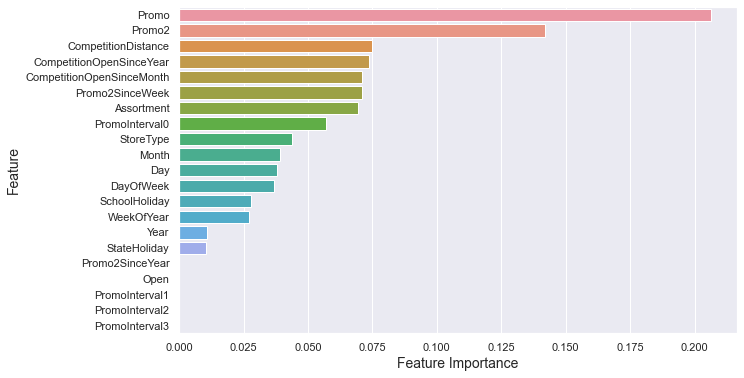

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()

In [17]:
y_preds = model.predict(X)
# plot_confusion_metrics(y, y_preds)

In [18]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

def accuracy(actual, pred):
    return accuracy_score(actual, pred)

In [19]:
print("Mean squared error: %.2f" % np.mean(y_preds - y) ** 2)

Mean squared error: 0.00


In [20]:
y_preds

array([4691.048 , 3548.9822, 8389.782 , ..., 9136.469 , 6897.368 ,
       7292.7295], dtype=float32)

In [21]:
final_data = X.copy()

In [22]:
final_data["y_true"] = y
final_data["y_pred"] = y_preds

In [23]:
final_data[["y_true", "y_pred"]].head()

,y_true,y_pred
235,3375,4691.05
266,2907,3548.98
300,6851,8389.78
379,14049,12529.91
422,3102,1809.43


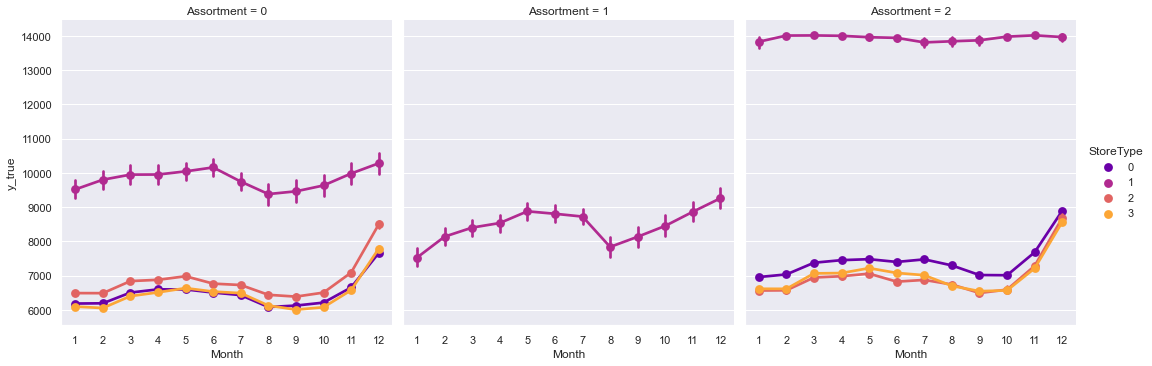

In [24]:
fp = sns.factorplot(data=final_data, x='Month', y="y_true", palette='plasma', hue='StoreType',
                    col='Assortment', color='green')

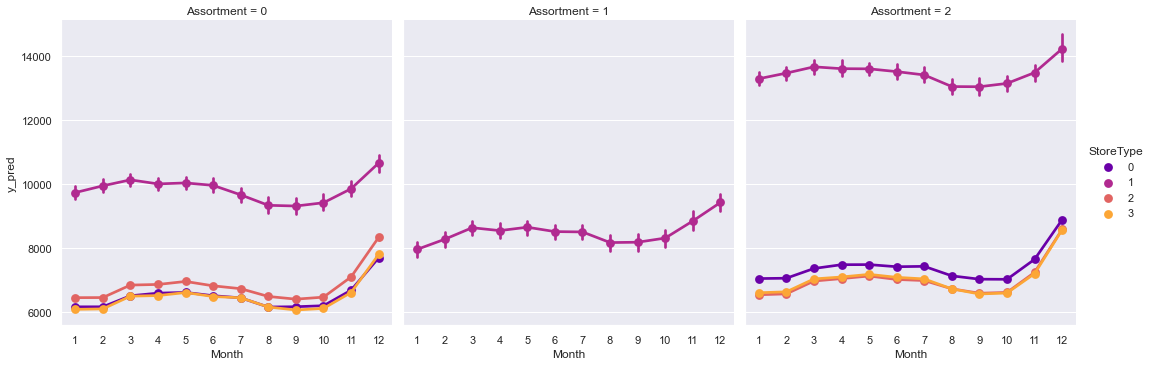

In [25]:
fp = sns.factorplot(data=final_data, x='Month', y="y_pred", palette='plasma', hue='StoreType',
                    col='Assortment', color='green')

In [26]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [27]:
daily_trend = final_data.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})

<AxesSubplot:xlabel='Day', ylabel='y_true'>

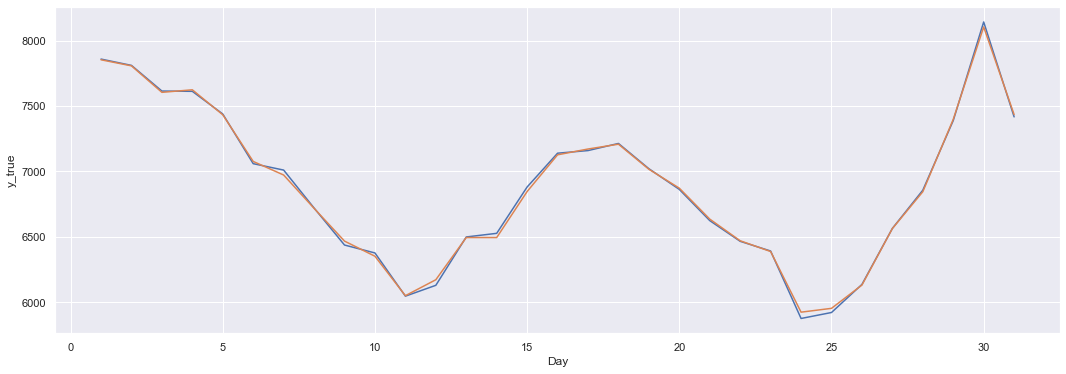

In [28]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])